# Movielens dataset

In [378]:
#import statements
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [379]:
#Loading data into pandas
data_user = pd.read_table('u.user', header=None, sep="|")
data_user.columns = ['user_id', 'age', 'gender', 'occupation', 'zip code']
data_udata = pd.read_table('u.data', header=None, delim_whitespace=True)
data_udata.columns = ['user_id', 'item id', 'rating', 'timestamp']

## Question1

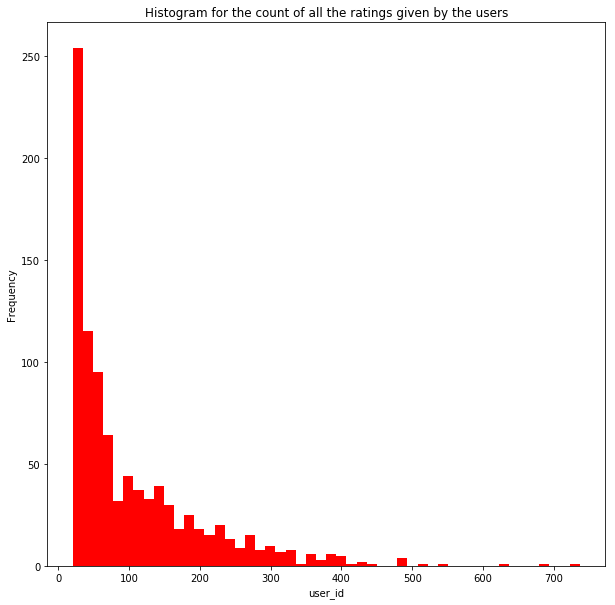

In [380]:
#finding the count of total ratings given by different users
data_udata.groupby(['user_id']).rating.count().plot(kind = 'hist', color='r', bins=50, figsize=(10,10))
plt.xlabel('user_id')
plt.title('Histogram for the count of all the ratings given by the users')
plt.show()

## Question2

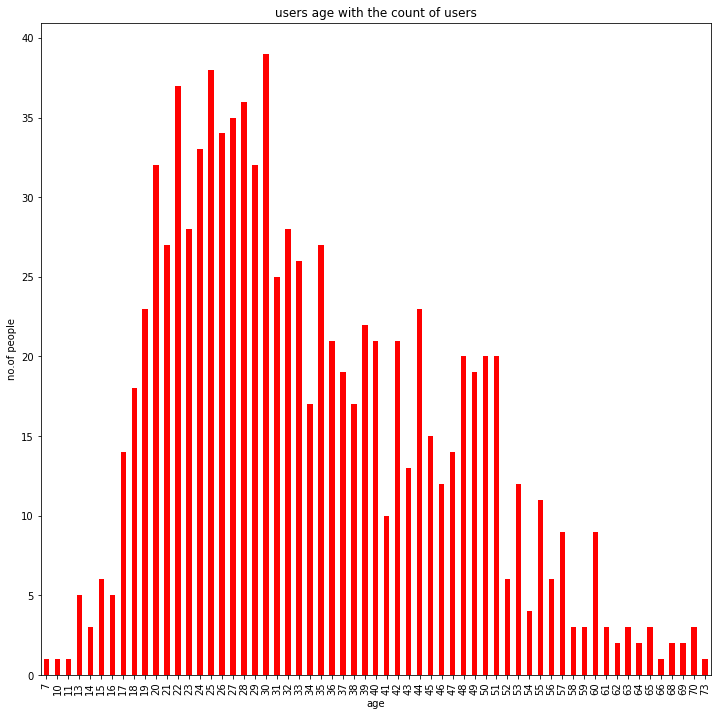

In [381]:
#finding the count of people of different ages
df_user_age = data_user.groupby(['age']).user_id.count().plot(kind='bar', color = 'r', figsize = (12,12))
plt.xlabel('age')
plt.ylabel('no.of people')
plt.title('users age with the count of users')
plt.show()

## Question3

In [382]:
#merging dataframes data_user and data_udata
df_merged_user_udata = pd.merge(data_user,data_udata, on='user_id', how = 'outer')
#removing unwanted columns
df_merged_user_udata.drop(['age', 'occupation', 'zip code', 'rating', 'timestamp'], axis = 1, inplace = True)


In [383]:
#uploading u.user into panda
data_item = pd.read_table('u.item', header = None, sep = "|" , encoding = "ISO-8859-1")
data_item.columns = ['item id','movie title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation',
                  'Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
                  'thriller','War','Western']
#removing unwanted columns
data_item.drop(['movie title', 'release date', 'video release date', 'IMDb URL'], axis = 1, inplace = True )

In [384]:
#creating new dataframe by merging data_item and df_merged_user_udata
df_genres_gender=pd.merge(df_merged_user_udata, data_item, on = 'item id', how = 'outer')
df_genres_gender.drop(['user_id','item id'], axis = 1, inplace = True)

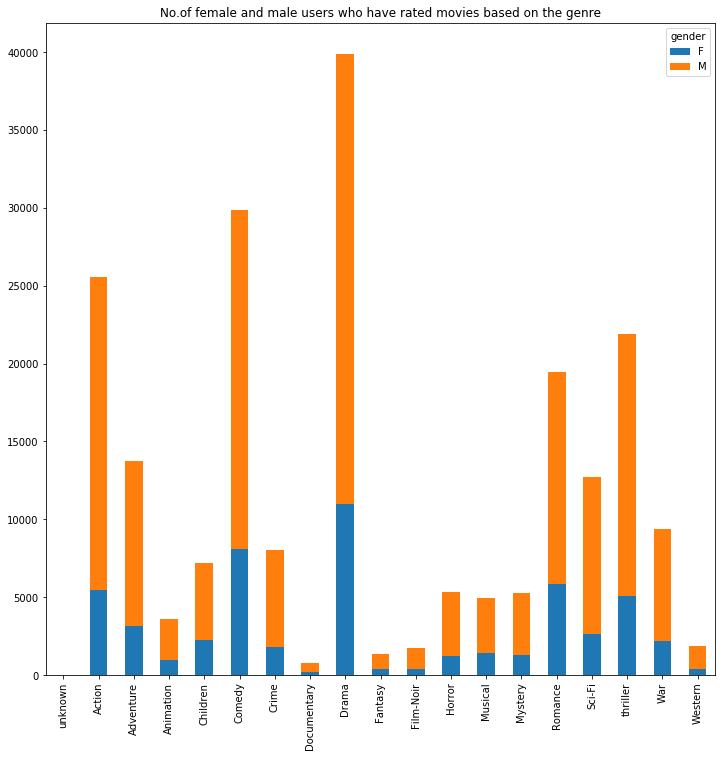

In [385]:
#finding the count of male and female users who rated different genres
genre_groupedby_gender = df_genres_gender.groupby('gender').sum()
genre_groupedby_gender.T.plot(kind='bar', stacked=True, figsize = (12,12))
plt.title('No.of female and male users who have rated movies based on the genre')
plt.show()